In [3]:
import numpy as np
import pandas as pd
import time
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
print(tf.version) # tensorflow 2.0
pd.options.display.max_rows = 8 # will use 8 by default for count, mean, std ... max
pd.options.display.max_columns = 9
pd.options.display.float_format = '{:.6f}'.format
pd.set_option('mode.chained_assignment', None)

Using TensorFlow backend.


<module 'tensorflow_core._api.v2.version' from 'c:\\users\\r-k-l\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>


For fold: 1
Accuracy: 0.7230769230769231
f-score: [0.78571429 0.60869565]
Precision: [0.91666667 0.48275862]
Recall: [0.6875     0.82352941]
Average precision-recall score: 0.44
For fold: 2
Accuracy: 0.6461538461538462
f-score: [0.74725275 0.41025641]
Precision: [0.77272727 0.38095238]
Recall: [0.72340426 0.44444444]
Average precision-recall score: 0.32
For fold: 3
Accuracy: 0.6615384615384615
f-score: [0.7962963 0.       ]
Precision: [0.70491803 0.        ]
Recall: [0.91489362 0.        ]
Average precision-recall score: 0.28
For fold: 4
Accuracy: 0.8461538461538461
f-score: [0.90384615 0.61538462]
Precision: [0.8245614 1.       ]
Recall: [1.         0.44444444]
Average precision-recall score: 0.60
For fold: 5
Accuracy: 0.453125
f-score: [0.42622951 0.47761194]
Precision: [0.92857143 0.32      ]
Recall: [0.27659574 0.94117647]
Average precision-recall score: 0.32


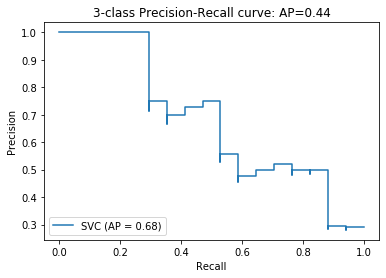

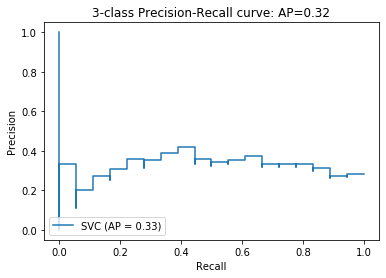

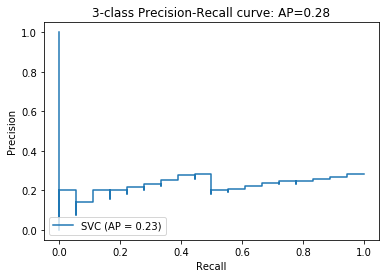

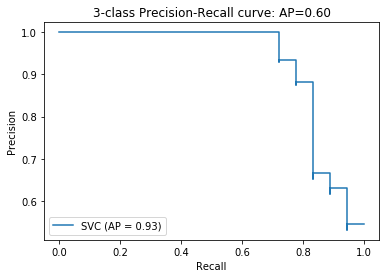

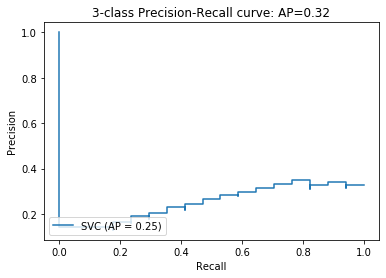

In [15]:
df = pd.read_csv("Dataset_Github_Labeled.csv")

# for Dataset_Github_Labeled.csv only: change y in the csv file to be assigned to one of three classes: High-grade, Low-grade, Normal
for i in range (0,324): # 0 - 323, same size as x
    #print(type(y[i]))
    if df['class'][i].startswith('High-grade'):  # if the last column contains text "High-grade", etc below.
        df['class'][i] = 0
    elif df['class'][i].startswith('Low-grade'):
        df['class'][i] = 0
    elif df['class'][i].startswith('Normal'):
        df['class'][i] = 1

X = df.drop(['class'], axis=1)
y = df['class']
lbl_encoder = LabelEncoder()
y= lbl_encoder.fit_transform(y)

# Perform Cross Validation. 
cv = StratifiedKFold(n_splits=5)
i=1
for train_index, test_index, in cv.split(X, y):
    # Select the indices. 
    sm = SMOTE()
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    
    # Choose a model. 
    model = SVC(kernel='linear', probability=True)
    model.fit(X_train_oversampled, y_train_oversampled ) 
    y_pred = model.predict(X_test)
    
    # Show results, ROC curve and prec_rec_fscore
    prec_rec_fscore = precision_recall_fscore_support(y_test, y_pred)
    print('For fold:', i)
    print('Accuracy:', model.score(X_test, y_test))
    print('f-score:', f1_score(y_test, y_pred, average=None))
    print('Precision:', prec_rec_fscore[0])
    print('Recall:', prec_rec_fscore[1])
    
    
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    disp = plot_precision_recall_curve(model, X_test, y_test)
    disp.ax_.set_title('3-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
    i+=1
        
